# Analysing insights about emergency and eletives surgerys

This .csv has many columns in your structure. Then, we can pick only few columns in this archive

* Column 3 - Estabelecimento
* Column 6 - Municipio do estabelecimento
* Column 7 - Complexidade do Procedimento
* Column 8 - Carater da internaca/ATENDIMENTO
* Column 12 - Sub grupo procedimento realizado	
* Column 14 - Procedimento realizado

In [18]:
import pandas as pd
%matplotlib inline

df = pd.read_csv('SIH_JAN_2017_CIRURGIAS_ELETIVA_E_EMERGENCIA.csv', sep=';', encoding = 'ISO-8859-1'
                , usecols=[3,6,7,8,12,14])

# Modifying columns name in order
df.columns = ['Hospital','Municipio','Complexidade','Carater','Sub Grupo','Procedimento']

df.head()

Hospital          Municipio  \
0  6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...  BRASILIA, DF, BR    
1  0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL  BRASILIA, DF, BR    
2  0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL  BRASILIA, DF, BR    
3  6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...  BRASILIA, DF, BR    
4  0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL  BRASILIA, DF, BR    

         Complexidade   Carater  \
0  Média complexidade   Eletivo   
1  Média complexidade  Urgência   
2  Média complexidade  Urgência   
3  Média complexidade   Eletivo   
4   Alta complexidade   Eletivo   

                                           Sub Grupo  \
0                   Sub Grupo: 15 - Outras cirurgias   
1  Sub Grupo: 03 - Cirurgia do sistema nervoso ce...   
2                   Sub Grupo: 15 - Outras cirurgias   
3  Sub Grupo: 07 - Cirurgia do aparelho digestivo...   
4              Sub Grupo: 16 - Cirurgia em oncologia   

                                       Procedimento  
0                 TRATAMENTO C/ CIRURGIAS MULTIPLAS  
1  DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA  
2                 TRATAMENTO C/ CIRURGIAS MULTIPLAS  
3                           HERNIOPLASTIA UMBILICAL  
4   RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA

## Columns Data type in CSV

In [25]:
df.dtypes

Hospital        object
Municipio       object
Complexidade    object
Carater         object
Sub Grupo       object
Procedimento    object
dtype: object

## Insights of values

In [23]:
# Show columns insights
df.describe()

Hospital          Municipio  \
count                                                4862               4862   
unique                                                 16                 11   
top     0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL  BRASILIA, DF, BR    
freq                                                  735               1923   

              Complexidade   Carater                            Sub Grupo  \
count                 4862      4862                                 4862   
unique                   2         4                                   16   
top     Média complexidade  Urgência  Sub Grupo: 11 - Cirurgia obstétrica   
freq                  4353      3794                                 1539   

           Procedimento  
count              4862  
unique              495  
top     PARTO CESARIANO  
freq               1060

**What happened in table above?** So, we have somes insights about:
* Amount registers in each column (`count`)
* Amount uniques values present in all columns (`unique`)
* Value name with more present in relation of others table rows (`top`)
* Numeric frequence in relation of top value (`freq`)

**Listing unique rows values per column with method `.unique()`**

Example: Municipio (BRASILIA, DF, BR; NATAL, RN, BR; EXTREMOZ, RN, BR; etc.), Hospital (HOSPITAL DA CRIANCA DE BRASILIA JOSE A..,  HOSPITAL DE BASE DO DISTRITO FEDERAL, etc.)


In [22]:
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [21]:
df['Municipio'].unique()

array(['BRASILIA, DF, BR ', 'TAGUATINGA, DF, BR ', 'BRAZLANDIA, DF, BR ',
       'CEILANDIA, DF, BR ', 'CRUZEIRO, DF, BR ', 'GAMA, DF, BR ',
       'PLANALTINA, DF, BR ', 'SAMAMBAIA, DF, BR ', 'SOBRADINHO, DF, BR ',
       'SANTA MARIA, DF, BR ', 'PARANOA, DF, BR '], dtype=object)

## Questions

**1. Surgerys amount in each Hospitals?**

In [27]:
df['Hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

**2. Surgerys amount in each Sub groups?**

In [32]:
subg = df['Sub Grupo']
subg.value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

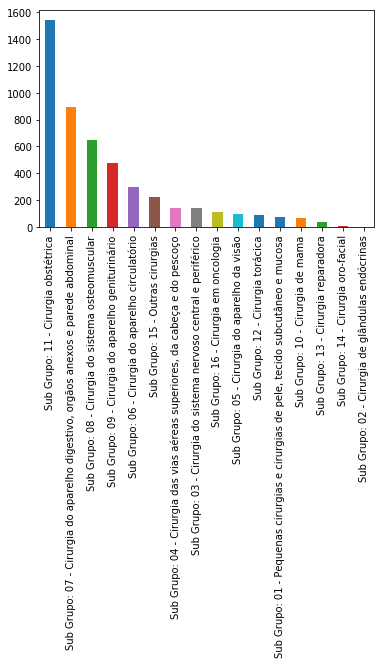

In [35]:
subg.value_counts().plot.bar()